In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import time
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
from scipy.io import loadmat
import nibabel as nib
import csv
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
from IPython import display
from scipy.ndimage import gaussian_filter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as patches
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape, Conv2DTranspose,\
LeakyReLU, GaussianNoise, GlobalMaxPooling2D, ReLU, Input, Concatenate
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
from keras.models import Model
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

<ipython-input-1-6aea0140af97>:24: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve


In [2]:
Ground_PATH = Path("/content/drive/MyDrive/Images/ground")
Render_PATH = Path("/content/drive/MyDrive/Images/render")

In [3]:
Ground_PNG = list(Ground_PATH.glob("*.png"))
Render_PNG = list(Render_PATH.glob("*.png"))

In [4]:
print("GROUND LEN: ", len(Ground_PNG))
print("---"*10)
print("RENDER LEN: ", len(Render_PNG))

GROUND LEN:  9823
------------------------------
RENDER LEN:  9844


In [5]:
print("10th GROUND: ",Ground_PNG[10])
print("---"*10)
print("10th RENDER: ",Render_PNG[10])

10th GROUND:  /content/drive/MyDrive/Images/ground/ground7747.png
------------------------------
10th RENDER:  /content/drive/MyDrive/Images/render/render7624.png


In [6]:
Sorted_Ground = sorted(Ground_PNG)
Sorted_Render = sorted(Render_PNG)

In [7]:
print("10th GROUND: ",Sorted_Ground[10])
print("---"*10)
print("10th RENDER: ",Sorted_Render[10])

10th GROUND:  /content/drive/MyDrive/Images/ground/ground0011.png
------------------------------
10th RENDER:  /content/drive/MyDrive/Images/render/render0011.png


In [8]:
Ground_SERIES = pd.Series(Sorted_Ground,name="MASK").astype(str)
Render_SERIES = pd.Series(Sorted_Render,name="IMAGE").astype(str)

In [9]:
print(Ground_SERIES.head(-1))

0       /content/drive/MyDrive/Images/ground/ground000...
1       /content/drive/MyDrive/Images/ground/ground000...
2       /content/drive/MyDrive/Images/ground/ground000...
3       /content/drive/MyDrive/Images/ground/ground000...
4       /content/drive/MyDrive/Images/ground/ground000...
                              ...                        
9817    /content/drive/MyDrive/Images/ground/ground976...
9818    /content/drive/MyDrive/Images/ground/ground976...
9819    /content/drive/MyDrive/Images/ground/ground976...
9820    /content/drive/MyDrive/Images/ground/ground976...
9821    /content/drive/MyDrive/Images/ground/ground976...
Name: MASK, Length: 9822, dtype: object


In [10]:
print(Render_SERIES.head(-1))


0       /content/drive/MyDrive/Images/render/render000...
1       /content/drive/MyDrive/Images/render/render000...
2       /content/drive/MyDrive/Images/render/render000...
3       /content/drive/MyDrive/Images/render/render000...
4       /content/drive/MyDrive/Images/render/render000...
                              ...                        
9838    /content/drive/MyDrive/Images/render/render976...
9839    /content/drive/MyDrive/Images/render/render976...
9840    /content/drive/MyDrive/Images/render/render976...
9841    /content/drive/MyDrive/Images/render/render976...
9842    /content/drive/MyDrive/Images/render/render976...
Name: IMAGE, Length: 9843, dtype: object


In [11]:
Main_Data = pd.concat([Render_SERIES,Ground_SERIES],axis=1)

In [12]:
print(Main_Data.columns)

Index(['IMAGE', 'MASK'], dtype='object')


In [13]:
print(Main_Data.isnull().sum())

IMAGE     0
MASK     21
dtype: int64


In [14]:
print(Main_Data.head(-1))


                                                  IMAGE  \
0     /content/drive/MyDrive/Images/render/render000...   
1     /content/drive/MyDrive/Images/render/render000...   
2     /content/drive/MyDrive/Images/render/render000...   
3     /content/drive/MyDrive/Images/render/render000...   
4     /content/drive/MyDrive/Images/render/render000...   
...                                                 ...   
9838  /content/drive/MyDrive/Images/render/render976...   
9839  /content/drive/MyDrive/Images/render/render976...   
9840  /content/drive/MyDrive/Images/render/render976...   
9841  /content/drive/MyDrive/Images/render/render976...   
9842  /content/drive/MyDrive/Images/render/render976...   

                                                   MASK  
0     /content/drive/MyDrive/Images/ground/ground000...  
1     /content/drive/MyDrive/Images/ground/ground000...  
2     /content/drive/MyDrive/Images/ground/ground000...  
3     /content/drive/MyDrive/Images/ground/ground000...  
4

In [15]:
Bounding_Box = pd.read_csv("/content/drive/MyDrive/Images/bounding_boxes.csv")


In [16]:
print(Bounding_Box.head(-1))

       Frame  TopLeftCornerX  TopLeftCornerY  Length  Height
0          1           278.5           192.5      56      38
1          2           599.5           151.5     121     130
2          3             5.5            46.5      90      87
3          5           239.5           101.5     103      21
4          6           682.5           124.5      34      26
...      ...             ...             ...     ...     ...
18861   9764           117.5           222.5      53      39
18862   9764           131.5           251.5     170     111
18863   9764           255.5           120.5      35      39
18864   9764           282.5            82.5      31      21
18865   9766           450.5            67.5      67      53

[18866 rows x 5 columns]


In [17]:
print(Bounding_Box["Frame"])

0           1
1           2
2           3
3           5
4           6
         ... 
18862    9764
18863    9764
18864    9764
18865    9766
18866    9766
Name: Frame, Length: 18867, dtype: int64


In [18]:
Bounding_Box = Bounding_Box.drop("Frame",axis=1)

In [19]:
print(Bounding_Box.head(-1))

       TopLeftCornerX  TopLeftCornerY  Length  Height
0               278.5           192.5      56      38
1               599.5           151.5     121     130
2                 5.5            46.5      90      87
3               239.5           101.5     103      21
4               682.5           124.5      34      26
...               ...             ...     ...     ...
18861           117.5           222.5      53      39
18862           131.5           251.5     170     111
18863           255.5           120.5      35      39
18864           282.5            82.5      31      21
18865           450.5            67.5      67      53

[18866 rows x 4 columns]


In [20]:
print("EXAMPLE 1th IMAGE BOUNDING:\n",Bounding_Box.iloc[0])

EXAMPLE 1th IMAGE BOUNDING:
 TopLeftCornerX    278.5
TopLeftCornerY    192.5
Length             56.0
Height             38.0
Name: 0, dtype: float64


In [21]:
print("EXAMPLE 1th IMAGE BOUNDING:\n",Bounding_Box.iloc[0].values)

EXAMPLE 1th IMAGE BOUNDING:
 [278.5 192.5  56.   38. ]


In [22]:
print("EXAMPLE 1th IMAGE BOUNDING TYPE:\n",type(Bounding_Box.iloc[0].values))

EXAMPLE 1th IMAGE BOUNDING TYPE:
 <class 'numpy.ndarray'>


In [23]:
plt.style.use("dark_background")

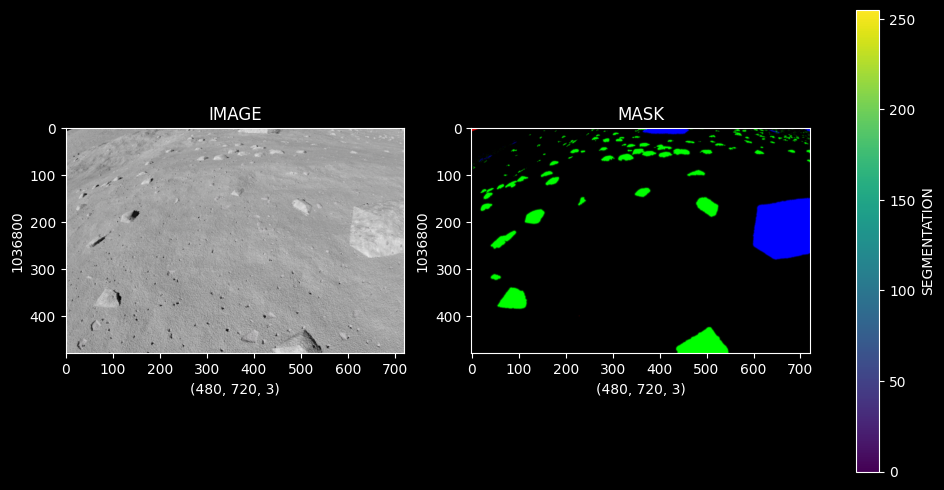

In [24]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Example_Picking_IMG = cv2.cvtColor(cv2.imread(Main_Data["IMAGE"][1]),cv2.COLOR_BGR2RGB)
Example_Picking_MASK = cv2.cvtColor(cv2.imread(Main_Data["MASK"][1]),cv2.COLOR_BGR2RGB)

axis[0].set_xlabel(Example_Picking_IMG.shape)
axis[0].set_ylabel(Example_Picking_IMG.size)
axis[0].set_title("IMAGE")
axis[0].imshow(Example_Picking_IMG)

axis[1].set_xlabel(Example_Picking_MASK.shape)
axis[1].set_ylabel(Example_Picking_MASK.size)
axis[1].set_title("MASK")
Operation_Colorbar = axis[1].imshow(Example_Picking_MASK)

figure.colorbar(Operation_Colorbar, ax=axis.ravel().tolist(), shrink=0.5,label='SEGMENTATION')

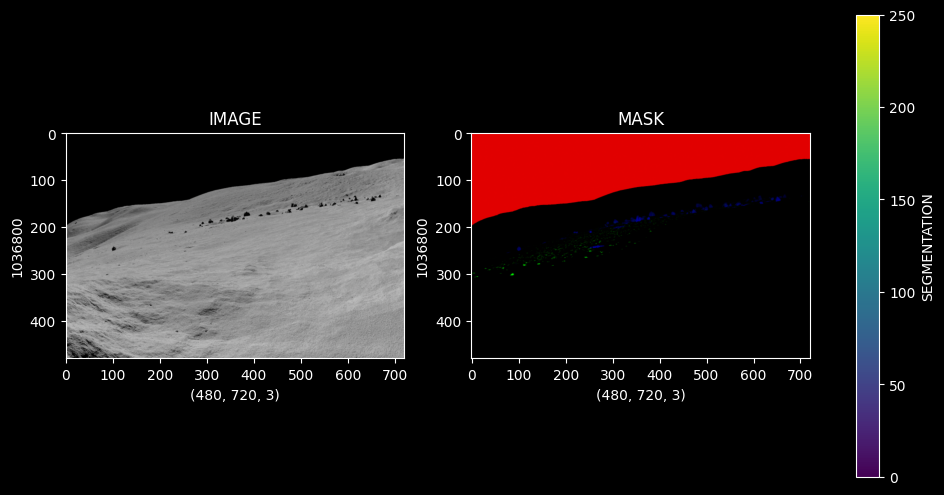

In [25]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Example_Picking_IMG = cv2.cvtColor(cv2.imread(Main_Data["IMAGE"][3]),cv2.COLOR_BGR2RGB)
Example_Picking_MASK = cv2.cvtColor(cv2.imread(Main_Data["MASK"][3]),cv2.COLOR_BGR2RGB)

axis[0].set_xlabel(Example_Picking_IMG.shape)
axis[0].set_ylabel(Example_Picking_IMG.size)
axis[0].set_title("IMAGE")
axis[0].imshow(Example_Picking_IMG)

axis[1].set_xlabel(Example_Picking_MASK.shape)
axis[1].set_ylabel(Example_Picking_MASK.size)
axis[1].set_title("MASK")
Operation_Colorbar = axis[1].imshow(Example_Picking_MASK)

figure.colorbar(Operation_Colorbar, ax=axis.ravel().tolist(), shrink=0.5,label='SEGMENTATION')

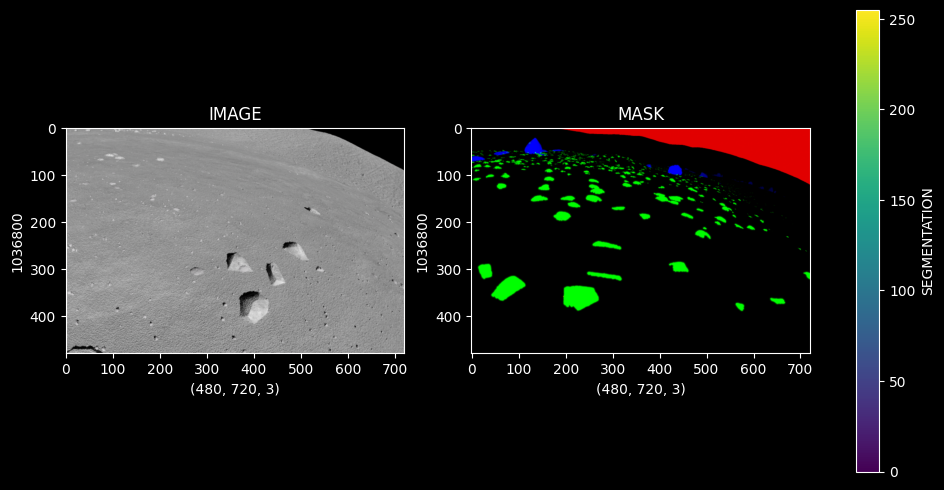

In [26]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Example_Picking_IMG = cv2.cvtColor(cv2.imread(Main_Data["IMAGE"][3000]),cv2.COLOR_BGR2RGB)
Example_Picking_MASK = cv2.cvtColor(cv2.imread(Main_Data["MASK"][3000]),cv2.COLOR_BGR2RGB)

axis[0].set_xlabel(Example_Picking_IMG.shape)
axis[0].set_ylabel(Example_Picking_IMG.size)
axis[0].set_title("IMAGE")
axis[0].imshow(Example_Picking_IMG)

axis[1].set_xlabel(Example_Picking_MASK.shape)
axis[1].set_ylabel(Example_Picking_MASK.size)
axis[1].set_title("MASK")
Operation_Colorbar = axis[1].imshow(Example_Picking_MASK)

figure.colorbar(Operation_Colorbar, ax=axis.ravel().tolist(), shrink=0.5,label='SEGMENTATION')

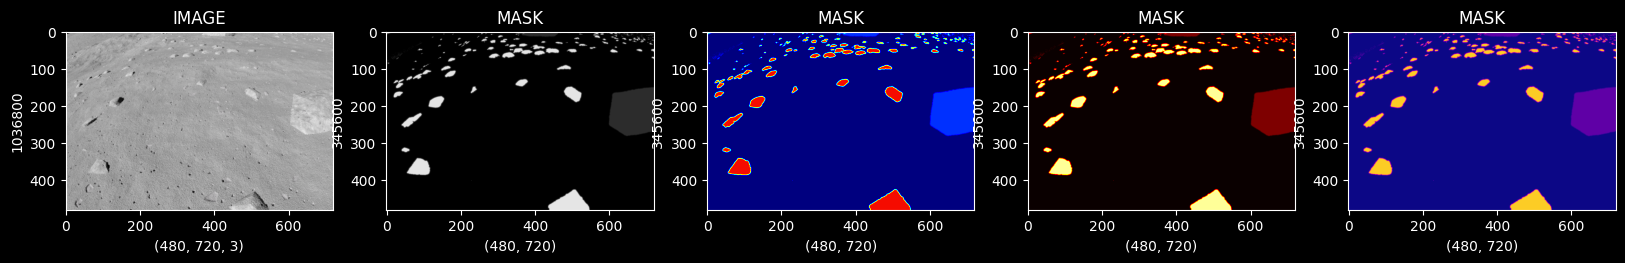

In [27]:
figure,axis = plt.subplots(1,5,figsize=(20,20))

Example_Picking_IMG = cv2.cvtColor(cv2.imread(Main_Data["IMAGE"][1]),cv2.COLOR_BGR2RGB)
Example_Picking_MASK = cv2.cvtColor(cv2.imread(Main_Data["MASK"][1]),cv2.COLOR_BGR2GRAY)

axis[0].set_xlabel(Example_Picking_IMG.shape)
axis[0].set_ylabel(Example_Picking_IMG.size)
axis[0].set_title("IMAGE")
axis[0].imshow(Example_Picking_IMG)

axis[1].set_xlabel(Example_Picking_MASK.shape)
axis[1].set_ylabel(Example_Picking_MASK.size)
axis[1].set_title("MASK")
axis[1].imshow(Example_Picking_MASK,cmap="gray")

axis[2].set_xlabel(Example_Picking_MASK.shape)
axis[2].set_ylabel(Example_Picking_MASK.size)
axis[2].set_title("MASK")
axis[2].imshow(Example_Picking_MASK,cmap="jet")

axis[3].set_xlabel(Example_Picking_MASK.shape)
axis[3].set_ylabel(Example_Picking_MASK.size)
axis[3].set_title("MASK")
axis[3].imshow(Example_Picking_MASK,cmap="hot")

axis[4].set_xlabel(Example_Picking_MASK.shape)
axis[4].set_ylabel(Example_Picking_MASK.size)
axis[4].set_title("MASK")
axis[4].imshow(Example_Picking_MASK,cmap="plasma")

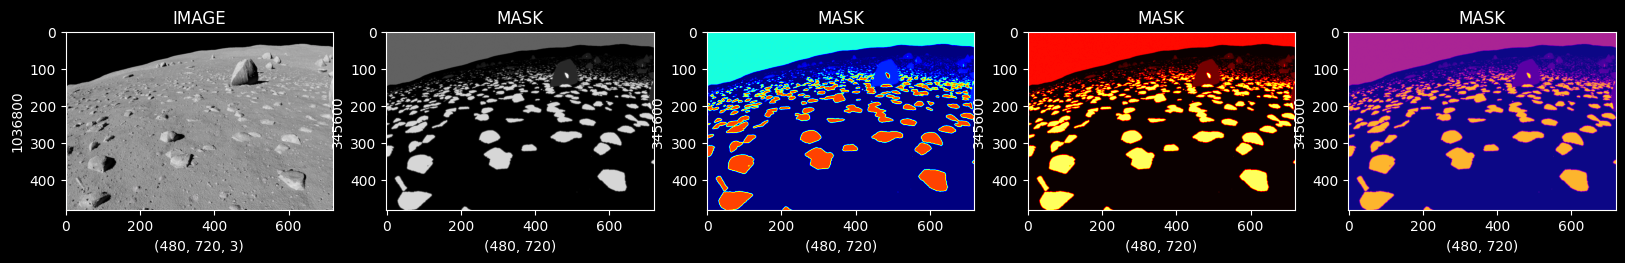

In [28]:
figure,axis = plt.subplots(1,5,figsize=(20,20))

Example_Picking_IMG = cv2.cvtColor(cv2.imread(Main_Data["IMAGE"][10]),cv2.COLOR_BGR2RGB)
Example_Picking_MASK = cv2.cvtColor(cv2.imread(Main_Data["MASK"][10]),cv2.COLOR_BGR2GRAY)

axis[0].set_xlabel(Example_Picking_IMG.shape)
axis[0].set_ylabel(Example_Picking_IMG.size)
axis[0].set_title("IMAGE")
axis[0].imshow(Example_Picking_IMG)

axis[1].set_xlabel(Example_Picking_MASK.shape)
axis[1].set_ylabel(Example_Picking_MASK.size)
axis[1].set_title("MASK")
axis[1].imshow(Example_Picking_MASK,cmap="gray")

axis[2].set_xlabel(Example_Picking_MASK.shape)
axis[2].set_ylabel(Example_Picking_MASK.size)
axis[2].set_title("MASK")
axis[2].imshow(Example_Picking_MASK,cmap="jet")

axis[3].set_xlabel(Example_Picking_MASK.shape)
axis[3].set_ylabel(Example_Picking_MASK.size)
axis[3].set_title("MASK")
axis[3].imshow(Example_Picking_MASK,cmap="hot")

axis[4].set_xlabel(Example_Picking_MASK.shape)
axis[4].set_ylabel(Example_Picking_MASK.size)
axis[4].set_title("MASK")
axis[4].imshow(Example_Picking_MASK,cmap="plasma")

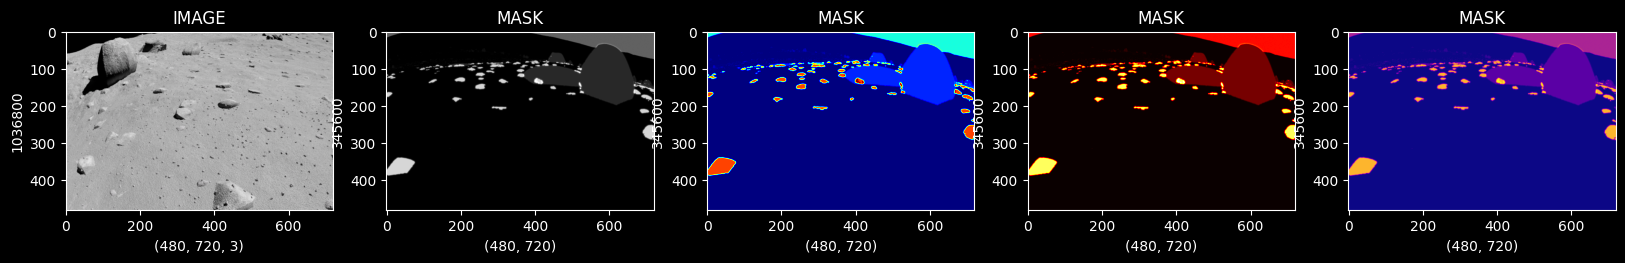

In [29]:
figure,axis = plt.subplots(1,5,figsize=(20,20))

Example_Picking_IMG = cv2.cvtColor(cv2.imread(Main_Data["IMAGE"][2345]),cv2.COLOR_BGR2RGB)
Example_Picking_MASK = cv2.cvtColor(cv2.imread(Main_Data["MASK"][2345]),cv2.COLOR_BGR2GRAY)

axis[0].set_xlabel(Example_Picking_IMG.shape)
axis[0].set_ylabel(Example_Picking_IMG.size)
axis[0].set_title("IMAGE")
axis[0].imshow(Example_Picking_IMG)

axis[1].set_xlabel(Example_Picking_MASK.shape)
axis[1].set_ylabel(Example_Picking_MASK.size)
axis[1].set_title("MASK")
axis[1].imshow(Example_Picking_MASK,cmap="gray")

axis[2].set_xlabel(Example_Picking_MASK.shape)
axis[2].set_ylabel(Example_Picking_MASK.size)
axis[2].set_title("MASK")
axis[2].imshow(Example_Picking_MASK,cmap="jet")

axis[3].set_xlabel(Example_Picking_MASK.shape)
axis[3].set_ylabel(Example_Picking_MASK.size)
axis[3].set_title("MASK")
axis[3].imshow(Example_Picking_MASK,cmap="hot")

axis[4].set_xlabel(Example_Picking_MASK.shape)
axis[4].set_ylabel(Example_Picking_MASK.size)
axis[4].set_title("MASK")
axis[4].imshow(Example_Picking_MASK,cmap="plasma")

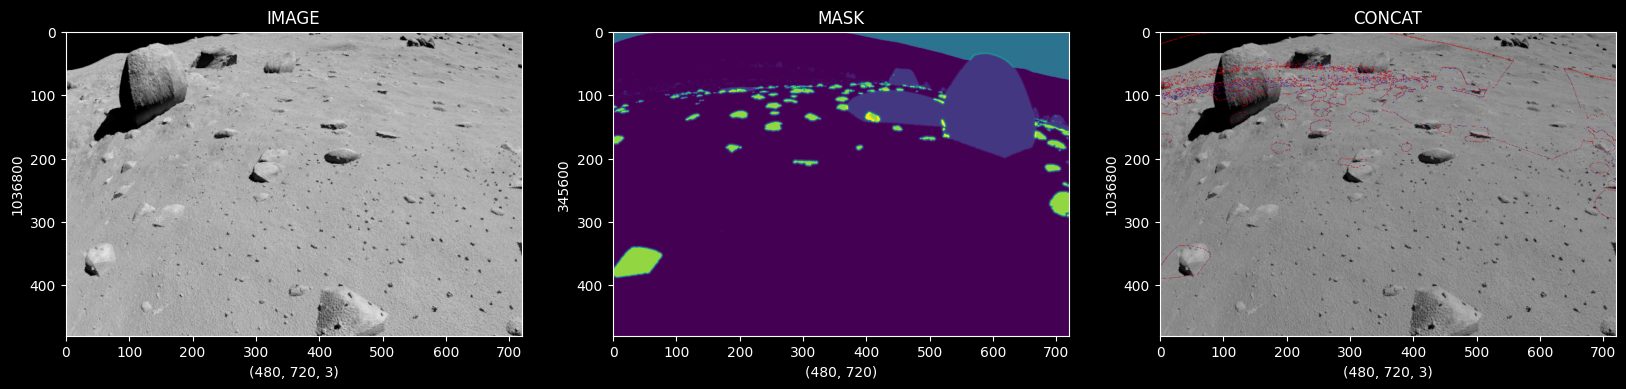

In [30]:
figure,axis = plt.subplots(1,3,figsize=(20,20))

Example_Picking_IMG = cv2.cvtColor(cv2.imread(Main_Data["IMAGE"][2345]),cv2.COLOR_BGR2RGB)
Example_Picking_MASK = cv2.cvtColor(cv2.imread(Main_Data["MASK"][2345]),cv2.COLOR_BGR2GRAY)

Copy_IMG = Example_Picking_IMG.copy()
Copy_IMG[Example_Picking_MASK == 1] = [255,0,0]
Copy_IMG[Example_Picking_MASK == 2] = [0,0,255]
Copy_Compile_IMG = Example_Picking_IMG.copy()

Layer_Concat_IMG = cv2.addWeighted(Copy_IMG,0.5,Copy_Compile_IMG,0.3,0,Copy_Compile_IMG)

axis[0].set_xlabel(Example_Picking_IMG.shape)
axis[0].set_ylabel(Example_Picking_IMG.size)
axis[0].set_title("IMAGE")
axis[0].imshow(Example_Picking_IMG)

axis[1].set_xlabel(Example_Picking_MASK.shape)
axis[1].set_ylabel(Example_Picking_MASK.size)
axis[1].set_title("MASK")
axis[1].imshow(Example_Picking_MASK)

axis[2].set_xlabel(Layer_Concat_IMG.shape)
axis[2].set_ylabel(Layer_Concat_IMG.size)
axis[2].set_title("CONCAT")
axis[2].imshow(Layer_Concat_IMG)

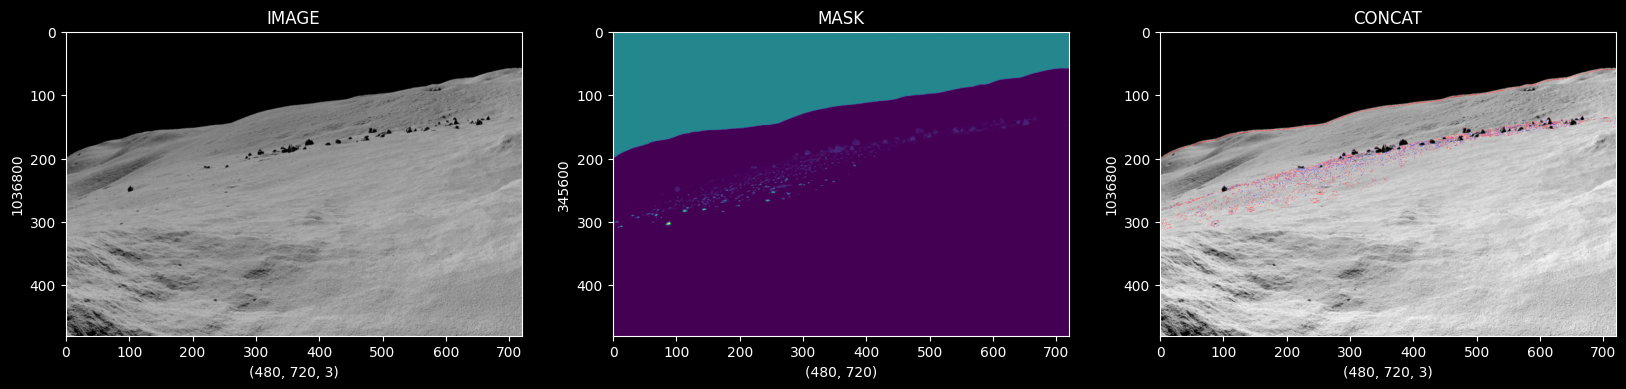

In [31]:
figure,axis = plt.subplots(1,3,figsize=(20,20))

Example_Picking_IMG = cv2.cvtColor(cv2.imread(Main_Data["IMAGE"][3]),cv2.COLOR_BGR2RGB)
Example_Picking_MASK = cv2.cvtColor(cv2.imread(Main_Data["MASK"][3]),cv2.COLOR_BGR2GRAY)

Copy_IMG = Example_Picking_IMG.copy()
Copy_IMG[Example_Picking_MASK == 1] = [255,0,0]
Copy_IMG[Example_Picking_MASK == 2] = [0,0,255]
Copy_Compile_IMG = Example_Picking_IMG.copy()

Layer_Concat_IMG = cv2.addWeighted(Copy_IMG,0.5,Copy_Compile_IMG,0.8,0.2,Copy_Compile_IMG)

axis[0].set_xlabel(Example_Picking_IMG.shape)
axis[0].set_ylabel(Example_Picking_IMG.size)
axis[0].set_title("IMAGE")
axis[0].imshow(Example_Picking_IMG)

axis[1].set_xlabel(Example_Picking_MASK.shape)
axis[1].set_ylabel(Example_Picking_MASK.size)
axis[1].set_title("MASK")
axis[1].imshow(Example_Picking_MASK)

axis[2].set_xlabel(Layer_Concat_IMG.shape)
axis[2].set_ylabel(Layer_Concat_IMG.size)
axis[2].set_title("CONCAT")
axis[2].imshow(Layer_Concat_IMG)

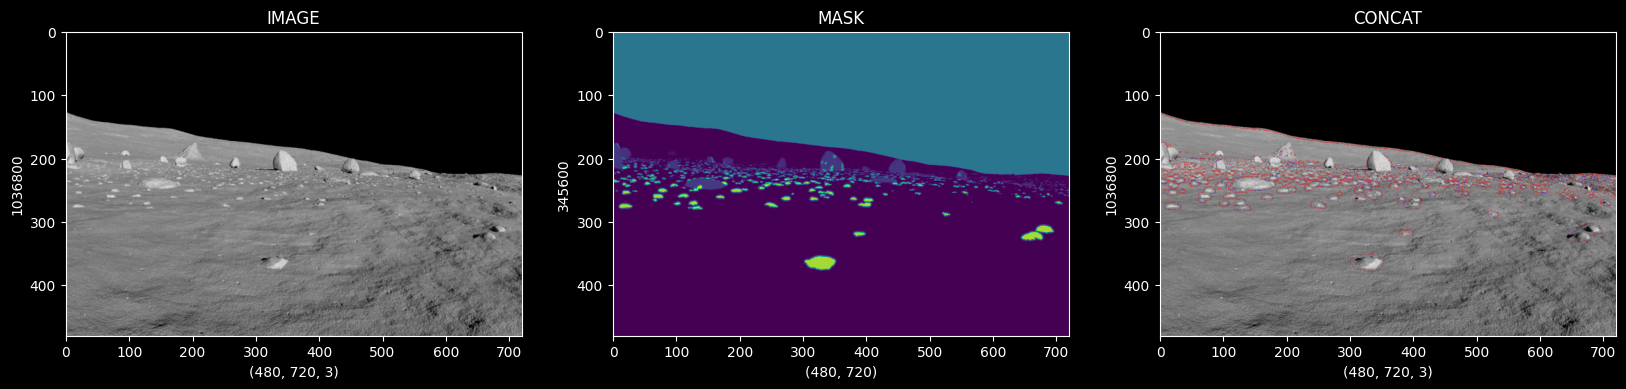

In [32]:
figure,axis = plt.subplots(1,3,figsize=(20,20))

Example_Picking_IMG = cv2.cvtColor(cv2.imread(Main_Data["IMAGE"][12]),cv2.COLOR_BGR2RGB)
Example_Picking_MASK = cv2.cvtColor(cv2.imread(Main_Data["MASK"][12]),cv2.COLOR_BGR2GRAY)

Copy_IMG = Example_Picking_IMG.copy()
Copy_IMG[Example_Picking_MASK == 1] = [255,0,0]
Copy_IMG[Example_Picking_MASK == 2] = [0,0,255]

Copy_Compile_IMG = Example_Picking_IMG.copy()

Layer_Concat_IMG = cv2.addWeighted(Copy_IMG,0.5,Copy_Compile_IMG,0.5,0,Copy_Compile_IMG)

axis[0].set_xlabel(Example_Picking_IMG.shape)
axis[0].set_ylabel(Example_Picking_IMG.size)
axis[0].set_title("IMAGE")
axis[0].imshow(Example_Picking_IMG)

axis[1].set_xlabel(Example_Picking_MASK.shape)
axis[1].set_ylabel(Example_Picking_MASK.size)
axis[1].set_title("MASK")
axis[1].imshow(Example_Picking_MASK)

axis[2].set_xlabel(Layer_Concat_IMG.shape)
axis[2].set_ylabel(Layer_Concat_IMG.size)
axis[2].set_title("CONCAT")
axis[2].imshow(Layer_Concat_IMG)

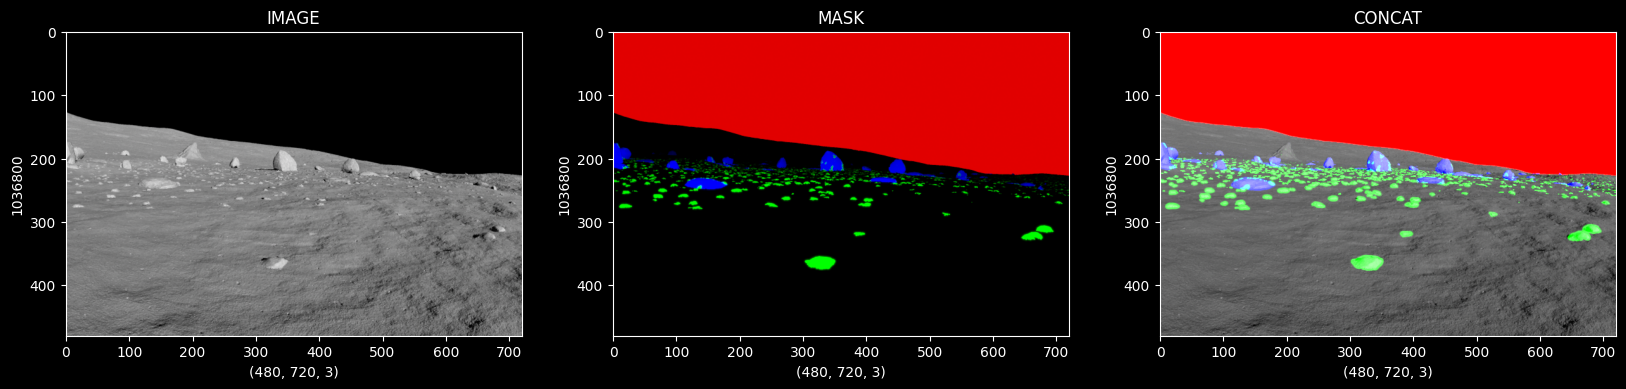

In [33]:
figure,axis = plt.subplots(1,3,figsize=(20,20))

Example_Picking_IMG = cv2.cvtColor(cv2.imread(Main_Data["IMAGE"][12]),cv2.COLOR_BGR2RGB)
Example_Picking_MASK = cv2.cvtColor(cv2.imread(Main_Data["MASK"][12]),cv2.COLOR_BGR2RGB)


Layer_Concat_IMG = cv2.addWeighted(Example_Picking_IMG,0.8,Example_Picking_MASK,5.0,0.5)

axis[0].set_xlabel(Example_Picking_IMG.shape)
axis[0].set_ylabel(Example_Picking_IMG.size)
axis[0].set_title("IMAGE")
axis[0].imshow(Example_Picking_IMG)

axis[1].set_xlabel(Example_Picking_MASK.shape)
axis[1].set_ylabel(Example_Picking_MASK.size)
axis[1].set_title("MASK")
axis[1].imshow(Example_Picking_MASK)

axis[2].set_xlabel(Layer_Concat_IMG.shape)
axis[2].set_ylabel(Layer_Concat_IMG.size)
axis[2].set_title("CONCAT")
axis[2].imshow(Layer_Concat_IMG)

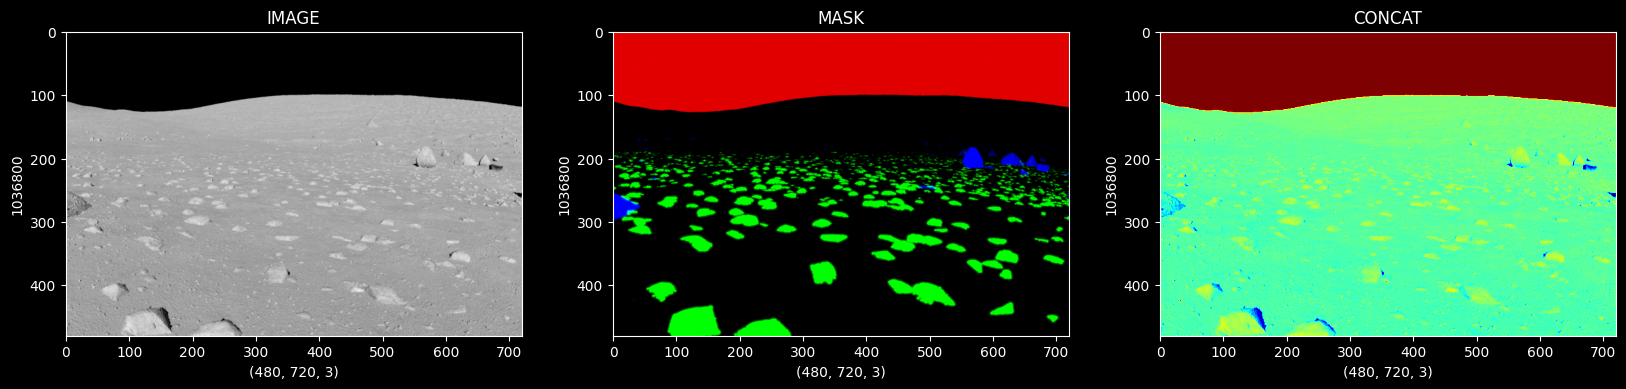

In [34]:
figure,axis = plt.subplots(1,3,figsize=(20,20))

Example_Picking_IMG = cv2.cvtColor(cv2.imread(Main_Data["IMAGE"][888]),cv2.COLOR_BGR2RGB)
Example_Picking_MASK = cv2.cvtColor(cv2.imread(Main_Data["MASK"][888]),cv2.COLOR_BGR2RGB)

Layer_Concat_IMG = cv2.addWeighted(Example_Picking_IMG,0.7,Example_Picking_MASK,2.9,1.5)

axis[0].set_xlabel(Example_Picking_IMG.shape)
axis[0].set_ylabel(Example_Picking_IMG.size)
axis[0].set_title("IMAGE")
axis[0].imshow(Example_Picking_IMG)

axis[1].set_xlabel(Example_Picking_MASK.shape)
axis[1].set_ylabel(Example_Picking_MASK.size)
axis[1].set_title("MASK")
axis[1].imshow(Example_Picking_MASK)

axis[2].set_xlabel(Layer_Concat_IMG.shape)
axis[2].set_ylabel(Layer_Concat_IMG.size)
axis[2].set_title("CONCAT")
axis[2].imshow(Layer_Concat_IMG[:,:,0],cmap="jet")

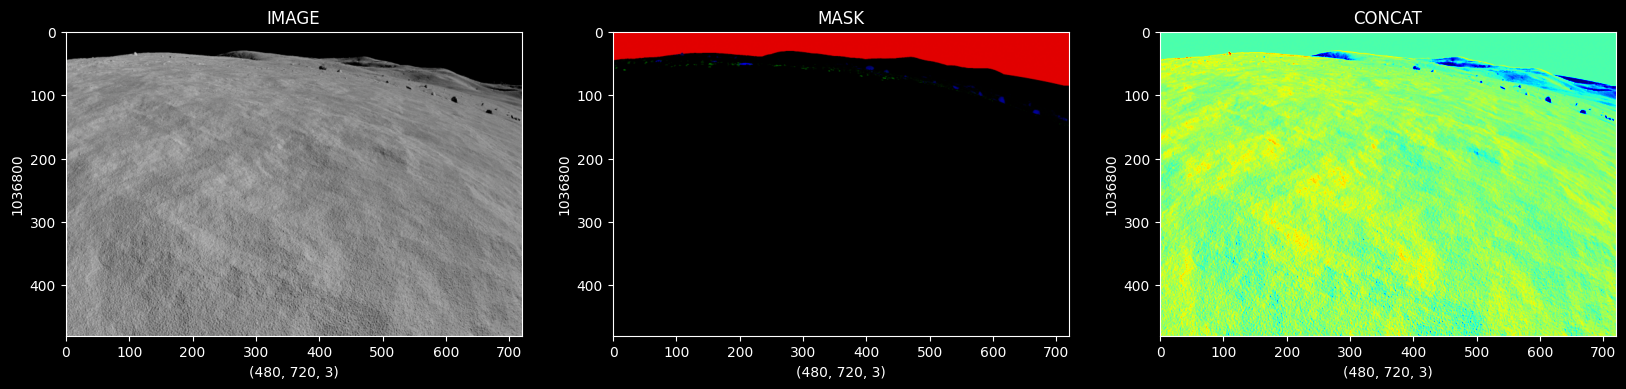

In [35]:
figure,axis = plt.subplots(1,3,figsize=(20,20))

Example_Picking_IMG = cv2.cvtColor(cv2.imread(Main_Data["IMAGE"][552]),cv2.COLOR_BGR2RGB)
Example_Picking_MASK = cv2.cvtColor(cv2.imread(Main_Data["MASK"][552]),cv2.COLOR_BGR2RGB)


Layer_Concat_IMG = cv2.addWeighted(Example_Picking_IMG,0.8,Example_Picking_MASK,0.4,0.5)

axis[0].set_xlabel(Example_Picking_IMG.shape)
axis[0].set_ylabel(Example_Picking_IMG.size)
axis[0].set_title("IMAGE")
axis[0].imshow(Example_Picking_IMG)

axis[1].set_xlabel(Example_Picking_MASK.shape)
axis[1].set_ylabel(Example_Picking_MASK.size)
axis[1].set_title("MASK")
axis[1].imshow(Example_Picking_MASK)

axis[2].set_xlabel(Layer_Concat_IMG.shape)
axis[2].set_ylabel(Layer_Concat_IMG.size)
axis[2].set_title("CONCAT")
axis[2].imshow(Layer_Concat_IMG[:,:,0],cmap="jet")

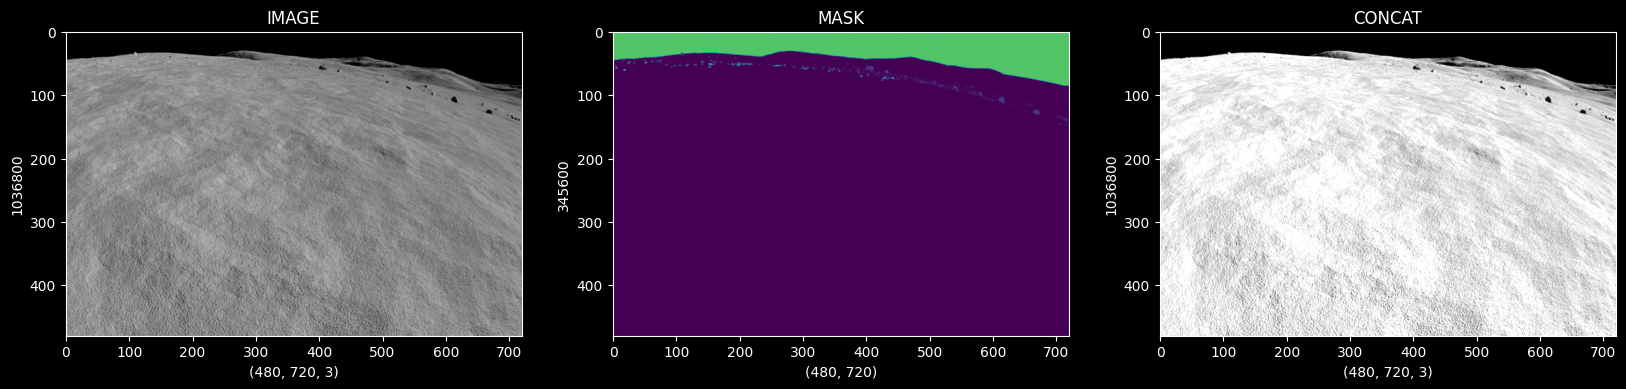

In [36]:
figure,axis = plt.subplots(1,3,figsize=(20,20))

Example_Picking_IMG = cv2.cvtColor(cv2.imread(Main_Data["IMAGE"][552]),cv2.COLOR_BGR2RGB)
Example_Picking_MASK = cv2.cvtColor(cv2.imread(Main_Data["MASK"][552]),cv2.COLOR_BGR2GRAY)

Copy_IMG = Example_Picking_IMG.copy()
Copy_IMG[Example_Picking_MASK == 255] = (255,0,255)

Layer_Concat_IMG = cv2.addWeighted(Example_Picking_IMG,0.8,Copy_IMG,0.9,0.5)

axis[0].set_xlabel(Example_Picking_IMG.shape)
axis[0].set_ylabel(Example_Picking_IMG.size)
axis[0].set_title("IMAGE")
axis[0].imshow(Example_Picking_IMG)

axis[1].set_xlabel(Example_Picking_MASK.shape)
axis[1].set_ylabel(Example_Picking_MASK.size)
axis[1].set_title("MASK")
axis[1].imshow(Example_Picking_MASK)

axis[2].set_xlabel(Layer_Concat_IMG.shape)
axis[2].set_ylabel(Layer_Concat_IMG.size)
axis[2].set_title("CONCAT")
axis[2].imshow(Layer_Concat_IMG)

In [37]:
print(Bounding_Box.iloc[0].values)

[278.5 192.5  56.   38. ]


In [38]:
print(Bounding_Box.iloc[0].values[0])
print(Bounding_Box.iloc[0].values[1])
print(Bounding_Box.iloc[0].values[2])
print(Bounding_Box.iloc[0].values[3])

278.5
192.5
56.0
38.0


In [39]:
print(Bounding_Box.iloc[0].values.reshape(2,2))

[[278.5 192.5]
 [ 56.   38. ]]


In [40]:
for coordinates_x, coordinates_y in Bounding_Box.iloc[0].values.reshape(2,2):
    coordinates_x = int(coordinates_x)
    coordinates_y = int(coordinates_y)
    print(coordinates_x)
    print(coordinates_y)

278
192
56
38


In [41]:
for coordinates_x, coordinates_y in Bounding_Box.iloc[0].values.reshape(2,2):
    print(coordinates_x)
    print(coordinates_y)

278.5
192.5
56.0
38.0


In [42]:
x = Bounding_Box.iloc[2].values[0]
y = Bounding_Box.iloc[2].values[1]
t = Bounding_Box.iloc[2].values[2]
s = Bounding_Box.iloc[2].values[3]
start_point = (x, y)
end_point = (x + t, y + s)
print(start_point)
print(end_point)

(5.5, 46.5)
(95.5, 133.5)


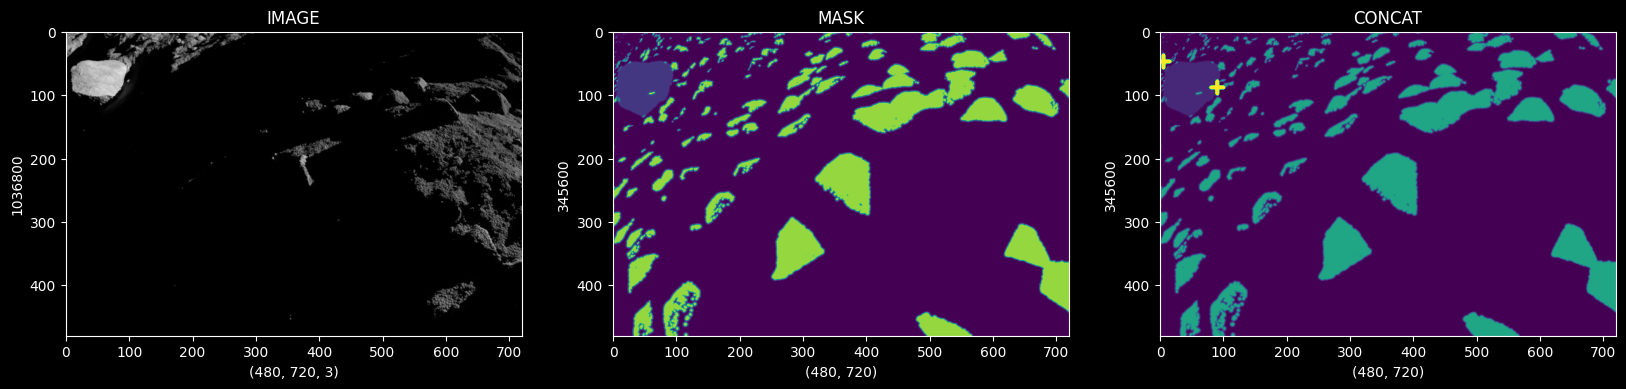

In [43]:
figure,axis = plt.subplots(1,3,figsize=(20,20))

Example_Picking_IMG = cv2.cvtColor(cv2.imread(Main_Data["IMAGE"][2]),cv2.COLOR_BGR2RGB)
Example_Picking_MASK = cv2.cvtColor(cv2.imread(Main_Data["MASK"][2]),cv2.COLOR_BGR2GRAY)

Copy_Mask = Example_Picking_MASK.copy()
for coordinates_x, coordinates_y in Bounding_Box.iloc[2].values.reshape(2,2):
    coordinates_x = int(coordinates_x)
    coordinates_y = int(coordinates_y)
    cv2.drawMarker(Copy_Mask, (coordinates_x, coordinates_y), (255, 0, 0),thickness=5)

axis[0].set_xlabel(Example_Picking_IMG.shape)
axis[0].set_ylabel(Example_Picking_IMG.size)
axis[0].set_title("IMAGE")
axis[0].imshow(Example_Picking_IMG)

axis[1].set_xlabel(Example_Picking_MASK.shape)
axis[1].set_ylabel(Example_Picking_MASK.size)
axis[1].set_title("MASK")
axis[1].imshow(Example_Picking_MASK)

axis[2].set_xlabel(Copy_Mask.shape)
axis[2].set_ylabel(Copy_Mask.size)
axis[2].set_title("CONCAT")
axis[2].imshow(Copy_Mask)

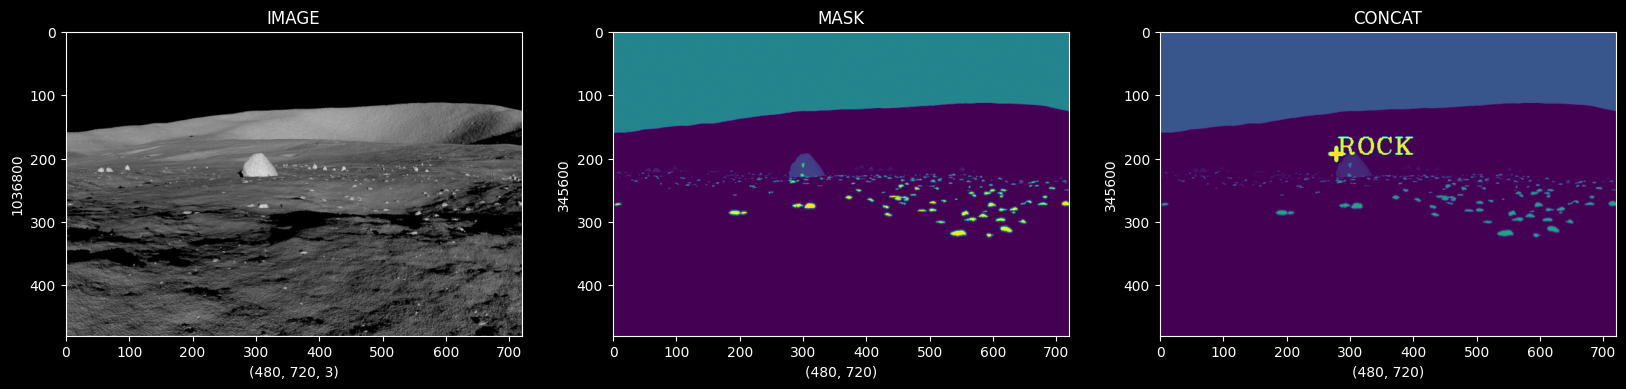

In [44]:
figure,axis = plt.subplots(1,3,figsize=(20,20))

Example_Picking_IMG = cv2.cvtColor(cv2.imread(Main_Data["IMAGE"][0]),cv2.COLOR_BGR2RGB)
Example_Picking_MASK = cv2.cvtColor(cv2.imread(Main_Data["MASK"][0]),cv2.COLOR_BGR2GRAY)

Copy_Mask = Example_Picking_MASK.copy()

x = Bounding_Box.iloc[0].values[0]
y = Bounding_Box.iloc[0].values[1]
t = Bounding_Box.iloc[0].values[2]
s = Bounding_Box.iloc[0].values[3]


Copy_Mask = Example_Picking_MASK.copy()

Marker_Image = cv2.drawMarker(Copy_Mask, (int(x), int(y)), (255, 0, 0),thickness=5)
cv2.putText(Copy_Mask, "ROCK", (int(x), int(y)), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (255, 0, 0), 2)

axis[0].set_xlabel(Example_Picking_IMG.shape)
axis[0].set_ylabel(Example_Picking_IMG.size)
axis[0].set_title("IMAGE")
axis[0].imshow(Example_Picking_IMG)

axis[1].set_xlabel(Example_Picking_MASK.shape)
axis[1].set_ylabel(Example_Picking_MASK.size)
axis[1].set_title("MASK")
axis[1].imshow(Example_Picking_MASK)

axis[2].set_xlabel(Marker_Image.shape)
axis[2].set_ylabel(Marker_Image.size)
axis[2].set_title("CONCAT")
axis[2].imshow(Marker_Image)

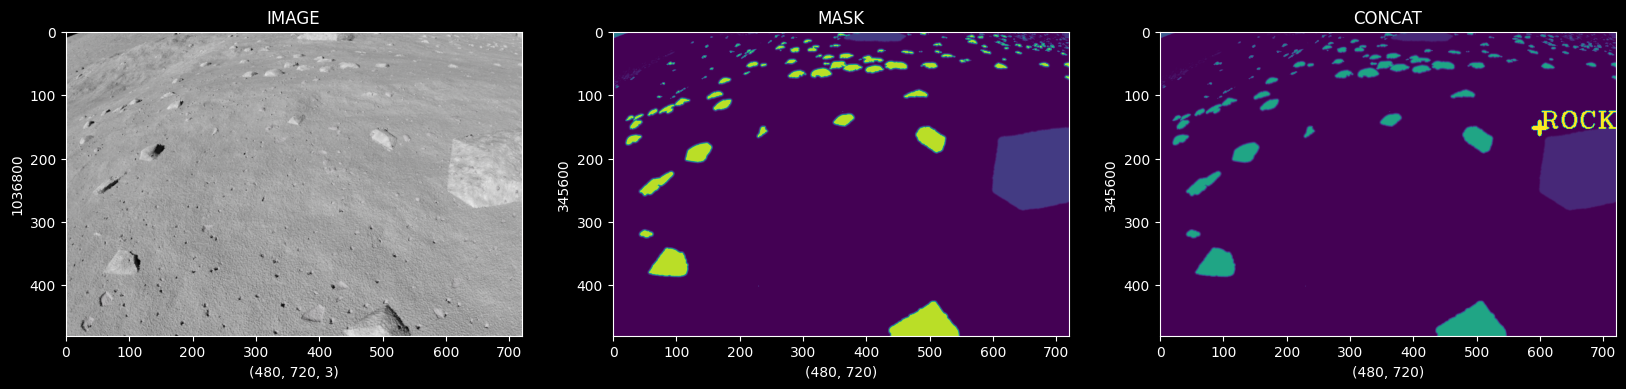

In [45]:
figure,axis = plt.subplots(1,3,figsize=(20,20))

Example_Picking_IMG = cv2.cvtColor(cv2.imread(Main_Data["IMAGE"][1]),cv2.COLOR_BGR2RGB)
Example_Picking_MASK = cv2.cvtColor(cv2.imread(Main_Data["MASK"][1]),cv2.COLOR_BGR2GRAY)

Copy_Mask = Example_Picking_MASK.copy()

x = Bounding_Box.iloc[1].values[0]
y = Bounding_Box.iloc[1].values[1]
t = Bounding_Box.iloc[1].values[2]
s = Bounding_Box.iloc[1].values[3]


Copy_Mask = Example_Picking_MASK.copy()

Marker_Image = cv2.drawMarker(Copy_Mask, (int(x), int(y)), (255, 0, 0),thickness=5)
cv2.putText(Copy_Mask, "ROCK", (int(x), int(y)), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (255, 0, 0), 2)
axis[0].set_xlabel(Example_Picking_IMG.shape)
axis[0].set_ylabel(Example_Picking_IMG.size)
axis[0].set_title("IMAGE")
axis[0].imshow(Example_Picking_IMG)

axis[1].set_xlabel(Example_Picking_MASK.shape)
axis[1].set_ylabel(Example_Picking_MASK.size)
axis[1].set_title("MASK")
axis[1].imshow(Example_Picking_MASK)

axis[2].set_xlabel(Marker_Image.shape)
axis[2].set_ylabel(Marker_Image.size)
axis[2].set_title("CONCAT")
axis[2].imshow(Marker_Image)


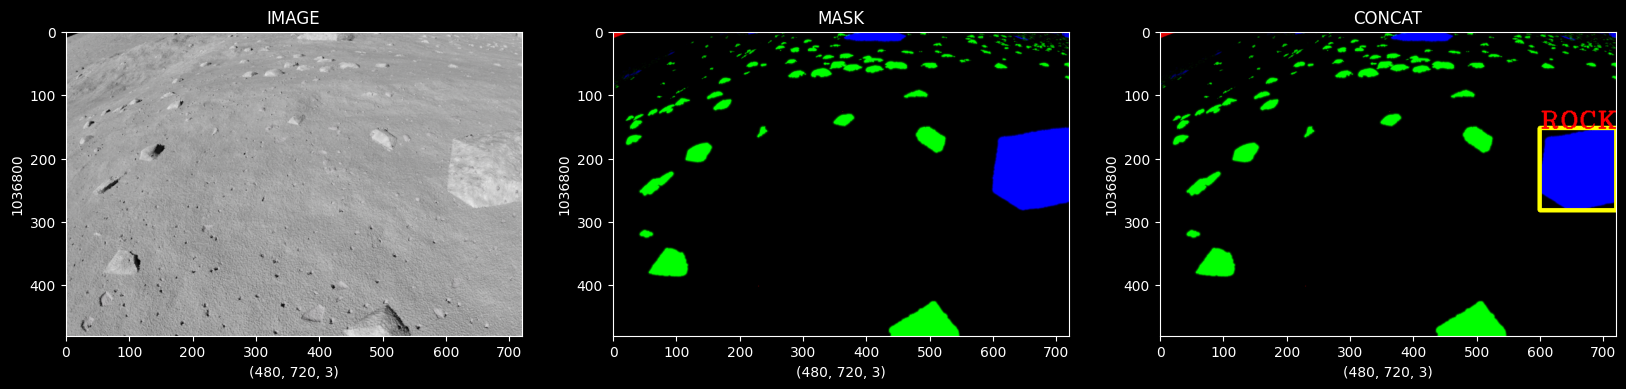

In [46]:
figure,axis = plt.subplots(1,3,figsize=(20,20))

Example_Picking_IMG = cv2.cvtColor(cv2.imread(Main_Data["IMAGE"][1]),cv2.COLOR_BGR2RGB)
Example_Picking_MASK = cv2.cvtColor(cv2.imread(Main_Data["MASK"][1]),cv2.COLOR_BGR2RGB)

Copy_Mask = Example_Picking_MASK.copy()

x = Bounding_Box.iloc[1].values[0]
y = Bounding_Box.iloc[1].values[1]
t = Bounding_Box.iloc[1].values[2]
s = Bounding_Box.iloc[1].values[3]

Copy_Mask = Example_Picking_MASK.copy()

Rec_IMG = cv2.rectangle(Copy_Mask, (int(x), int(y)), (int(x + t), int(y + s)), (255, 255, 0), 5)
cv2.putText(Copy_Mask, "ROCK", (int(x), int(y)), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (255, 0, 0), 2)

axis[0].set_xlabel(Example_Picking_IMG.shape)
axis[0].set_ylabel(Example_Picking_IMG.size)
axis[0].set_title("IMAGE")
axis[0].imshow(Example_Picking_IMG)

axis[1].set_xlabel(Example_Picking_MASK.shape)
axis[1].set_ylabel(Example_Picking_MASK.size)
axis[1].set_title("MASK")
axis[1].imshow(Example_Picking_MASK)

axis[2].set_xlabel(Rec_IMG.shape)
axis[2].set_ylabel(Rec_IMG.size)
axis[2].set_title("CONCAT")
axis[2].imshow(Rec_IMG)


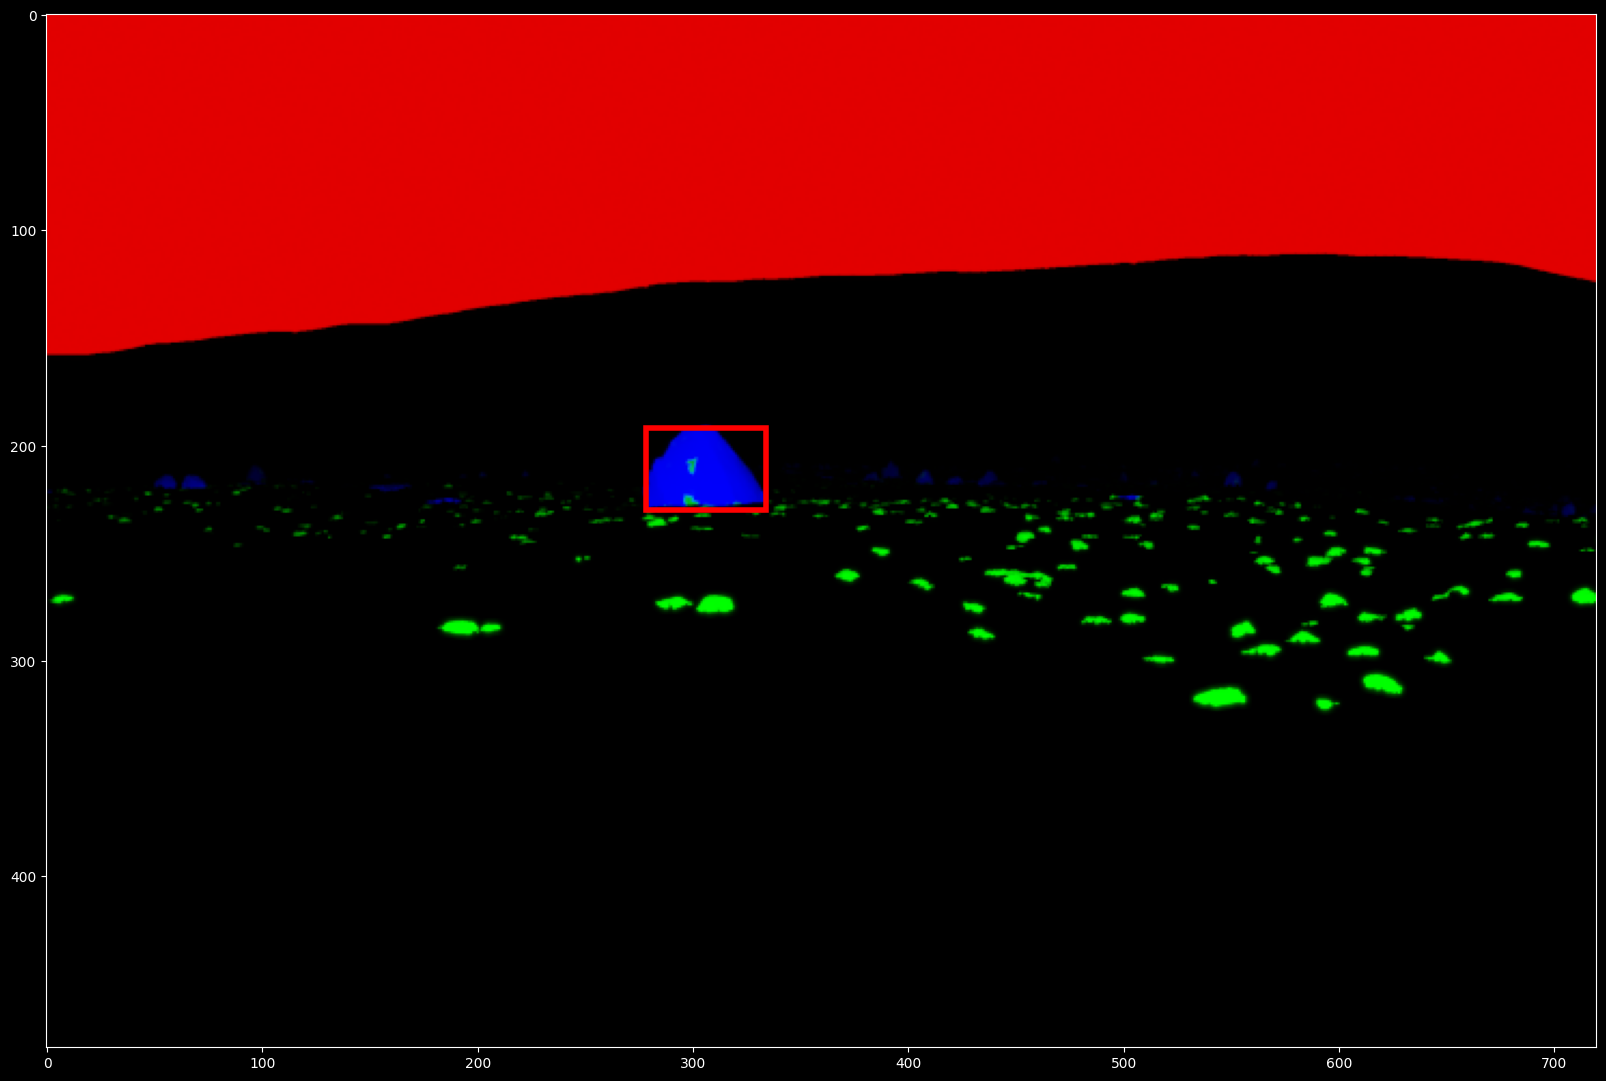

In [47]:
figure,axis = plt.subplots(1,figsize=(20,20))

Example_Picking_IMG = cv2.cvtColor(cv2.imread(Main_Data["IMAGE"][0]),cv2.COLOR_BGR2RGB)
Example_Picking_MASK = cv2.cvtColor(cv2.imread(Main_Data["MASK"][0]),cv2.COLOR_BGR2RGB)

Bound_Coor = []
with open("/content/drive/MyDrive/Images/bounding_boxes.csv") as bounding_boxes_csv:
    CSV_Reader = csv.reader(bounding_boxes_csv, delimiter=',')
    next(bounding_boxes_csv)
    for rows in CSV_Reader:
        if rows[0] == '1':
            Bound_Coor.append(rows[1:5])
        else:
            break
axis.imshow(Example_Picking_MASK)

for bounding_coor in Bound_Coor:
    bounding_box = list(map(float, bounding_coor))
    Rect_Image = patches.Rectangle((bounding_box[0]-0.5,bounding_box[1]-0.5),
                             bounding_box[2],bounding_box[3],
                             linewidth=4,
                             edgecolor='r',facecolor='none')
    axis.add_patch(Rect_Image)


In [48]:
Main_Data_Reduced = Main_Data[0:1000]

In [49]:
print(Main_Data_Reduced.head(-1))

                                                 IMAGE  \
0    /content/drive/MyDrive/Images/render/render000...   
1    /content/drive/MyDrive/Images/render/render000...   
2    /content/drive/MyDrive/Images/render/render000...   
3    /content/drive/MyDrive/Images/render/render000...   
4    /content/drive/MyDrive/Images/render/render000...   
..                                                 ...   
994  /content/drive/MyDrive/Images/render/render099...   
995  /content/drive/MyDrive/Images/render/render099...   
996  /content/drive/MyDrive/Images/render/render099...   
997  /content/drive/MyDrive/Images/render/render099...   
998  /content/drive/MyDrive/Images/render/render099...   

                                                  MASK  
0    /content/drive/MyDrive/Images/ground/ground000...  
1    /content/drive/MyDrive/Images/ground/ground000...  
2    /content/drive/MyDrive/Images/ground/ground000...  
3    /content/drive/MyDrive/Images/ground/ground000...  
4    /content/driv

In [50]:
Image_List = []
Transformation_List = []

for image_x,mask_x in zip(Main_Data_Reduced.IMAGE.values,Main_Data_Reduced.MASK.values):

    Picking_IMG = cv2.cvtColor(cv2.imread(image_x),cv2.COLOR_BGR2RGB)
    Picking_MASK = cv2.cvtColor(cv2.imread(mask_x),cv2.COLOR_BGR2RGB)
    Layer_Concat_IMG = cv2.addWeighted(Picking_IMG,0.8,Picking_MASK,5.0,0.5)

    Resized_Image = cv2.resize(Picking_IMG,(256,256))
    Resized_Transformation = cv2.resize(Layer_Concat_IMG,(256,256))

    Resized_Image = Resized_Image / 255.
    Resized_Transformation = Resized_Transformation / 255.

    Image_List.append(Resized_Image)
    Transformation_List.append(Resized_Transformation)

In [51]:
print("ARRAY IMAGE SHAPE: ",np.shape(np.array(Image_List)))
print("ARRAY MASK SHAPE: ",np.shape(np.array(Transformation_List)))

ARRAY IMAGE SHAPE:  (1000, 256, 256, 3)
ARRAY MASK SHAPE:  (1000, 256, 256, 3)


Text(0.5, 1.0, 'LUNAR')

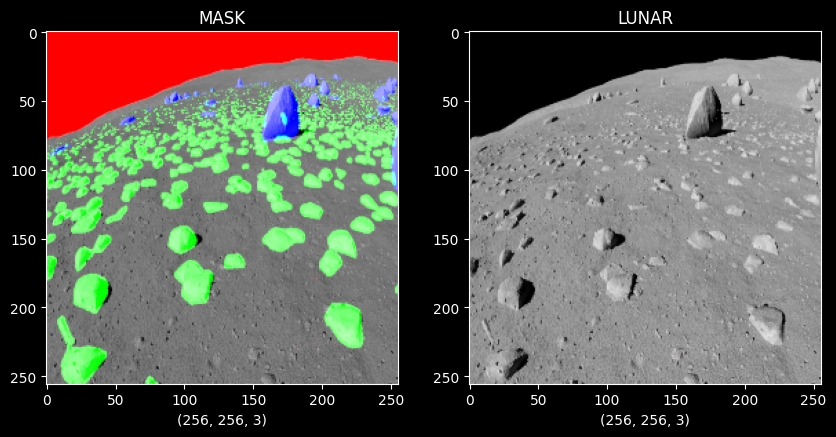

In [52]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Transformation_List[10])
axis[0].set_xlabel(Transformation_List[10].shape)
axis[0].set_title("MASK")
axis[1].imshow(Image_List[10])
axis[1].set_xlabel(Image_List[10].shape)
axis[1].set_title("LUNAR")

Text(0.5, 1.0, 'LUNAR')

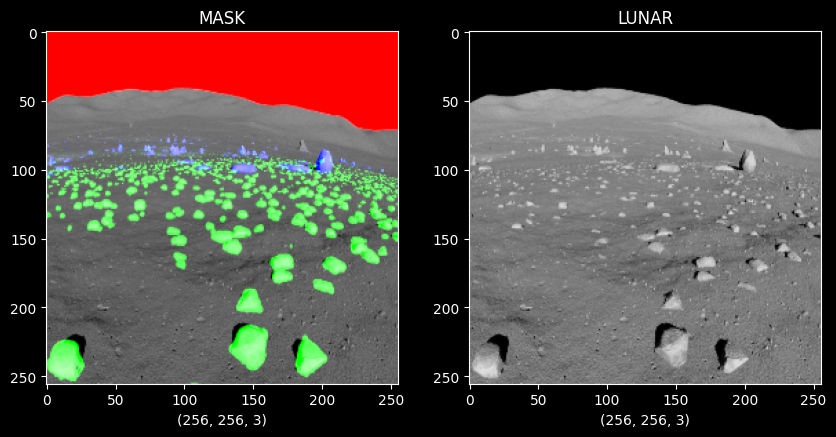

In [53]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Transformation_List[100])
axis[0].set_xlabel(Transformation_List[100].shape)
axis[0].set_title("MASK")
axis[1].imshow(Image_List[100])
axis[1].set_xlabel(Image_List[100].shape)
axis[1].set_title("LUNAR")

Text(0.5, 1.0, 'LUNAR')

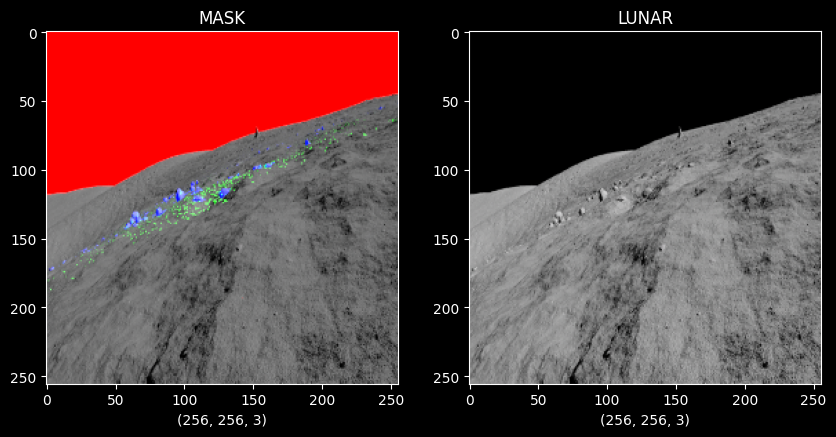

In [54]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Transformation_List[450])
axis[0].set_xlabel(Transformation_List[450].shape)
axis[0].set_title("MASK")
axis[1].imshow(Image_List[450])
axis[1].set_xlabel(Image_List[450].shape)
axis[1].set_title("LUNAR")

In [55]:
Train_Set = np.array(Image_List,dtype="float32")
Transformation_Set = np.array(Transformation_List,dtype="float32")

In [56]:
print("TRAIN SHAPE: ",Train_Set.shape)
print("TRANSFORMATION SHAPE: ",Transformation_Set.shape)
print("---"*10)
print("TRAIN DTYPE: ",Train_Set.dtype)
print("TRANSFORMATION DTYPE: ",Transformation_Set.dtype)

TRAIN SHAPE:  (1000, 256, 256, 3)
TRANSFORMATION SHAPE:  (1000, 256, 256, 3)
------------------------------
TRAIN DTYPE:  float32
TRANSFORMATION DTYPE:  float32


In [57]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, BatchNormalization, ReLU, Input
from tensorflow.keras.optimizers import Adam

# Compile parameters
compile_loss = "binary_crossentropy"
compile_optimizer = Adam(learning_rate=0.0001)
output_class = 3  # Set to 3 to match the number of channels in the input images

Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck.weights.h5")

# Define U-Net model
def unet_model(input_shape):
    inputs = Input(shape=input_shape)

    # Encoder (Downsampling)
    c1 = Conv2D(32, (3, 3), kernel_initializer='he_normal', padding="same")(inputs)
    c1 = BatchNormalization()(c1)
    c1 = ReLU()(c1)
    c1 = Conv2D(32, (3, 3), kernel_initializer='he_normal', padding="same")(c1)
    c1 = BatchNormalization()(c1)
    c1 = ReLU()(c1)
    p1 = MaxPooling2D((2,2))(c1)

    c2 = Conv2D(64, (3,3), kernel_initializer='he_normal', padding="same")(p1)
    c2 = BatchNormalization()(c2)
    c2 = ReLU()(c2)
    c2 = Conv2D(64, (3,3), kernel_initializer='he_normal', padding="same")(c2)
    c2 = BatchNormalization()(c2)
    c2 = ReLU()(c2)
    p2 = MaxPooling2D((2,2))(c2)

    c3 = Conv2D(128, (3, 3), kernel_initializer='he_normal', padding="same")(p2)
    c3 = BatchNormalization()(c3)
    c3 = ReLU()(c3)
    c3 = Conv2D(128, (3, 3), kernel_initializer='he_normal', padding="same")(c3)
    c3 = BatchNormalization()(c3)
    c3 = ReLU()(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = Conv2D(256, (3, 3), kernel_initializer='he_normal', padding="same")(p3)
    c4 = BatchNormalization()(c4)
    c4 = ReLU()(c4)
    c4 = Conv2D(256, (3, 3), kernel_initializer='he_normal', padding="same")(c4)
    c4 = BatchNormalization()(c4)
    c4 = ReLU()(c4)

    # Decoder (Upsampling)
    u1 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(c4)
    u1 = concatenate([u1, c3])
    c5 = Conv2D(128, (3, 3), kernel_initializer='he_normal', padding="same")(u1)
    c5 = BatchNormalization()(c5)
    c5 = ReLU()(c5)
    c5 = Conv2D(128, (3, 3), kernel_initializer='he_normal', padding="same")(c5)
    c5 = BatchNormalization()(c5)
    c5 = ReLU()(c5)

    u2 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(c5)
    u2 = concatenate([u2, c2])
    c6 = Conv2D(64, (3, 3), kernel_initializer='he_normal', padding="same")(u2)
    c6 = BatchNormalization()(c6)
    c6 = ReLU()(c6)
    c6 = Conv2D(64, (3, 3), kernel_initializer='he_normal', padding="same")(c6)
    c6 = BatchNormalization()(c6)
    c6 = ReLU()(c6)

    u3 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding="same")(c6)
    u3 = concatenate([u3, c1])
    c7 = Conv2D(32, (3, 3), kernel_initializer='he_normal', padding="same")(u3)
    c7 = BatchNormalization()(c7)
    c7 = ReLU()(c7)
    c7 = Conv2D(32, (3, 3), kernel_initializer='he_normal', padding="same")(c7)
    c7 = BatchNormalization()(c7)
    c7 = ReLU()(c7)

    outputs = Conv2D(output_class, (1, 1), activation='sigmoid')(c7)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Instantiate and compile the U-Net model
input_shape = (256, 256, 3)
model = unet_model(input_shape)
model.compile(optimizer=compile_optimizer, loss=compile_loss, metrics=["mse"])

# Example data generation
def generate_data(num_samples, img_shape):
    X = tf.random.normal((num_samples, *img_shape))
    y = tf.random.normal((num_samples, *img_shape))
    return X, y

# Generate example data
Train_Set, Transformation_Set = generate_data(100, (256, 256, 3))

# Train the model
Model_U_Net = model.fit(Train_Set, Transformation_Set, epochs=55, callbacks=[Checkpoint_Model])


Epoch 1/55
4/4 ━━━━━━━━━━━━━━━━━━━━ 80s 7s/step - loss: 0.8411 - mse: 1.3114
Epoch 2/55
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 361ms/step - loss: 0.8309 - mse: 1.3076
Epoch 3/55
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 364ms/step - loss: 0.8220 - mse: 1.3040
Epoch 4/55
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 366ms/step - loss: 0.8138 - mse: 1.3011
Epoch 5/55
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 367ms/step - loss: 0.8057 - mse: 1.2979
Epoch 6/55
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 370ms/step - loss: 0.7988 - mse: 1.2949
Epoch 7/55
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 368ms/step - loss: 0.7911 - mse: 1.2922
Epoch 8/55
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 367ms/step - loss: 0.7844 - mse: 1.2894
Epoch 9/55
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 370ms/step - loss: 0.7774 - mse: 1.2865
Epoch 10/55
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 369ms/step - loss: 0.7706 - mse: 1.2835
Epoch 11/55
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 369ms/step - loss: 0.7638 - mse: 1.2805
Epoch 12/55
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 372ms/step - loss: 0.7569 - mse: 1.2776
Epoch 13/55
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 370ms/step 

In [58]:
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 32)   │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256, 256, 32)   │            128 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 256, 256, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 32)   │          9,248 │ re_lu[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 256, 256, 32)   │            128 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 256, 256, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 32)   │              0 │ re_lu_1[0][0]          │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 64)   │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128, 128, 64)   │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_2 (ReLU)            │ (None, 128, 128, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ re_lu_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 128, 128, 64)   │            256 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_3 (ReLU)            │ (None, 128, 128, 64)   │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 64)     │              0 │ re_lu_3[0][0]          │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4

 Total params: 5,788,267 (22.08 MB)

 Trainable params: 1,928,483 (7.36 MB)

 Non-trainable params: 2,816 (11.00 KB)

 Optimizer params: 3,856,968 (14.71 MB)

None


In [59]:
print(model.layers)

[<InputLayer name=input_layer, built=True>, <Conv2D name=conv2d, built=True>, <BatchNormalization name=batch_normalization, built=True>, <ReLU name=re_lu, built=True>, <Conv2D name=conv2d_1, built=True>, <BatchNormalization name=batch_normalization_1, built=True>, <ReLU name=re_lu_1, built=True>, <MaxPooling2D name=max_pooling2d, built=True>, <Conv2D name=conv2d_2, built=True>, <BatchNormalization name=batch_normalization_2, built=True>, <ReLU name=re_lu_2, built=True>, <Conv2D name=conv2d_3, built=True>, <BatchNormalization name=batch_normalization_3, built=True>, <ReLU name=re_lu_3, built=True>, <MaxPooling2D name=max_pooling2d_1, built=True>, <Conv2D name=conv2d_4, built=True>, <BatchNormalization name=batch_normalization_4, built=True>, <ReLU name=re_lu_4, built=True>, <Conv2D name=conv2d_5, built=True>, <BatchNormalization name=batch_normalization_5, built=True>, <ReLU name=re_lu_5, built=True>, <MaxPooling2D name=max_pooling2d_2, built=True>, <Conv2D name=conv2d_6, built=True>, <

In [60]:
print(f"Total trainable parameters: {model.count_params()}")

Total trainable parameters: 1931299


In [61]:
Prediction_MASK_Seen = model.predict(Train_Set[:12])


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Text(0.5, 1.0, 'Actual')

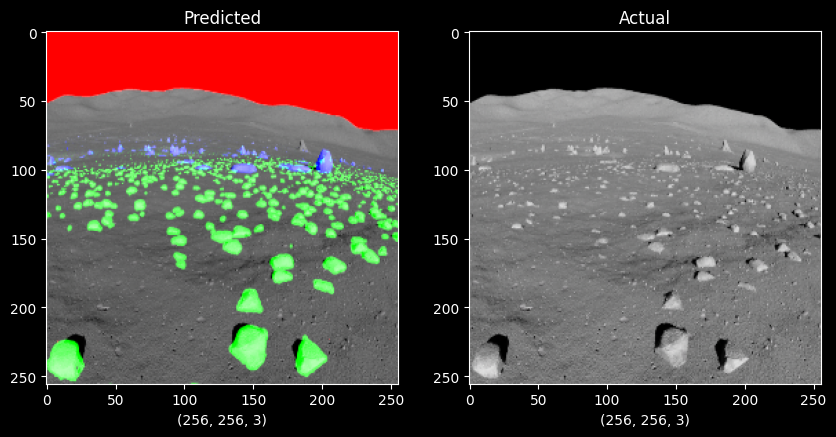

In [62]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Transformation_List[100])
axis[0].set_xlabel(Transformation_List[100].shape)
axis[0].set_title("Predicted")
axis[1].imshow(Image_List[100])
axis[1].set_xlabel(Image_List[100].shape)
axis[1].set_title("Actual")